In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
df = pd.read_csv('News.csv', header='infer')[:2000]
df['text'] = df['headline'] + df['short_description'] + df['authors']
df['category'] = LabelEncoder().fit_transform(df['category'])
print(df.__len__())
df = df.dropna(how='any')
print(df.__len__())
df.head(1)

headline  category  \
0   There Were 2 Mass Shootings In Texas Last Wee...   CRIME     

              authors                                  short_description  
0   Melissa Jeltsen     She left her husband. He killed their childre...

<Axes: >

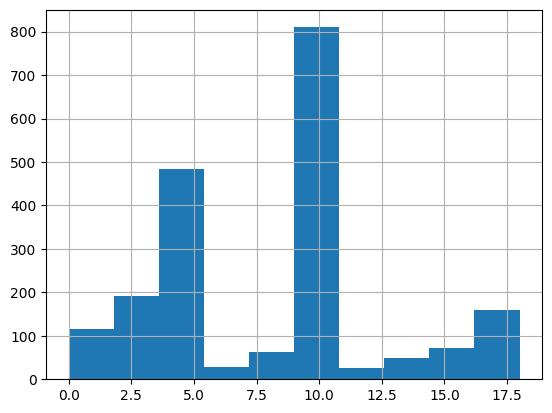

In [31]:
df['category'].hist()

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text']).toarray()  
y = df['category']

In [32]:
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(sampling_strategy='minority')
print(X.__len__())
X, y = ros.fit_resample(X, y)
print(X.__len__())

2000
2707


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
# Initialize and train regression models
models = [
    ("LinearSVC", LinearSVC()),
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("SGDClassifier", SGDClassifier()),
    ("XGBClassifier", XGBClassifier()),
]

# Initialize a list to store results
results = []

# Fit and evaluate each model
for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    ACC = accuracy_score(y_test, y_pred)
    
    results.append([name, ACC])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=["Model", "ACC"])

# Find the model with the lowest MSE and highest R-squared
best_r2_model = results_df.loc[results_df["ACC"].idxmax()]

print("\nModel Evaluation Results:")
print(results_df)
print("\nBest model based on ACC:")
print(best_r2_model)

LinearSVC
DecisionTreeClassifier
SGDClassifier
XGBClassifier

Model Evaluation Results:
                    Model       ACC
0               LinearSVC  0.785978
1  DecisionTreeClassifier  0.686347
2           SGDClassifier  0.769373
3           XGBClassifier  0.773063

Best model based on ACC:
Model    LinearSVC
ACC       0.785978
Name: 0, dtype: object
